In [1]:
import pandas as pd
import seaborn as sns

In [2]:
from tqdm import tqdm

In [3]:
from ast import literal_eval

In [4]:
tqdm.pandas()

In [5]:
tcc = pd.read_csv("data/MUSIC4ALL/processed/tcc_music4all.csv", index_col=0)

In [6]:
tcc.head()

,lyrics,artist,song,album_name,genres,spotify_id,popularity,danceability,energy,key,...,duration_ms,acousticness,instrumentalness,liveness,loudness,speechiness,time_signature,explicit,nb_genres,year
12,"De tanto me perder, de andar sem sono\nPor ess...",Adriana Calcanhotto,Um Dia Desses,Maré,['mpb'],30Iofj66ashW2QYbROuIC2,24,0.724,0.339,0,...,151013,0.86800,0.000001,0.1130,-12.043,0.0333,4,0,1,2008
16,No meio dessa confusão\nCê me deixou na mão\nC...,UM44K,Nossa música,Nossa música,"['pop', 'rap']",4hpcc2wq84pilUgDbIPkDN,53,0.592,0.387,2,...,239643,0.85300,0.000000,0.1070,-9.567,0.0407,4,0,2,2018
18,Radio bemba 00.0 Super Sónica\nAtento\nO bixo ...,Manu Chao,Bixo,Próxima Estación: Esperanza,"['latin', 'reggae', 'world']",3JJIdDXjN8oH6ZfPv3pApB,42,0.658,0.452,5,...,112040,0.76200,0.000000,0.5060,-9.929,0.1530,4,0,3,2001
19,Gostei da sua ideia\nEntrei na sua selva\nVocê...,Selvagens à Procura de Lei,Enquanto Eu Passar Na Sua Rua,Selvagens à Procura de Lei,"['indie rock', 'rock']",0BMowyr7gejwveFKRkhj0l,44,0.526,0.771,6,...,203987,0.12800,0.000006,0.1670,-5.507,0.0325,4,0,2,2013
47,"Já tive mulheres (salve Martinho), de todos os...",Motirô,Senhorita,Um Passo à Frente,['hip hop'],5se489TZrnQLUXZq8vARkY,13,0.844,0.591,11,...,255987,0.00618,0.000000,0.0262,-5.830,0.3000,4,0,1,2006


In [7]:
tcc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6513 entries, 12 to 109242
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lyrics            6513 non-null   object 
 1   artist            6513 non-null   object 
 2   song              6513 non-null   object 
 3   album_name        6513 non-null   object 
 4   genres            6513 non-null   object 
 5   spotify_id        6513 non-null   object 
 6   popularity        6513 non-null   int64  
 7   danceability      6513 non-null   float64
 8   energy            6513 non-null   float64
 9   key               6513 non-null   int64  
 10  mode              6513 non-null   int64  
 11  valence           6513 non-null   float64
 12  tempo             6513 non-null   float64
 13  duration_ms       6513 non-null   int64  
 14  acousticness      6513 non-null   float64
 15  instrumentalness  6513 non-null   float64
 16  liveness          6513 non-null   float

In [8]:
tcc.genres = tcc.genres.progress_apply(literal_eval)

100%|██████████| 6513/6513 [00:00<00:00, 104021.50it/s]


In [9]:
tcc.describe()

,popularity,danceability,energy,key,mode,valence,tempo,duration_ms,acousticness,instrumentalness,liveness,loudness,speechiness,time_signature,explicit,nb_genres,year
count,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000
mean,27.255028,0.580778,0.625575,5.476739,0.621373,0.561548,121.765231,218427.417933,0.359305,0.032699,0.250550,-8.313029,0.074941,3.930754,0.029326,2.017657,2005.746200
std,17.780783,0.156392,0.225432,3.551151,0.485082,0.247725,28.681485,63009.999526,0.300103,0.128242,0.235294,3.679590,0.080983,0.347810,0.168732,1.080666,13.609447
min,0.000000,0.064500,0.000042,0.000000,0.000000,0.035100,49.286000,32152.000000,0.000003,0.000000,0.019700,-31.624000,0.022400,1.000000,0.000000,1.000000,1957.000000
25%,13.000000,0.476000,0.469000,2.000000,0.000000,0.362000,98.019000,180040.000000,0.072600,0.000000,0.102000,-10.313000,0.033600,4.000000,0.000000,1.000000,2001.000000
50%,28.000000,0.587000,0.646000,6.000000,1.000000,0.569000,120.168000,212267.000000,0.305000,0.000009,0.143000,-7.749000,0.044600,4.000000,0.000000,2.000000,2011.000000
75%,41.000000,0.694000,0.811000,9.000000,1.000000,0.768000,140.007000,248128.000000,0.610000,0.001050,0.314000,-5.739000,0.075400,4.000000,0.000000,3.000000,2016.000000
max,72.000000,0.974000,1.000000,11.000000,1.000000,0.989000,207.909000,868813.000000,0.995000,0.970000,0.992000,0.801000,0.942000,5.000000,1.000000,7.000000,2022.000000


In [7]:
tcc["explicit_cat"] = tcc.explicit.astype("category")

In [8]:
tcc["mode_cat"] = tcc["mode"].astype("category")

In [9]:
tcc["time_signature_cat"] = tcc.time_signature.astype("category")

In [10]:
tcc["key_cat"] = tcc.key.astype("category")

# Mode

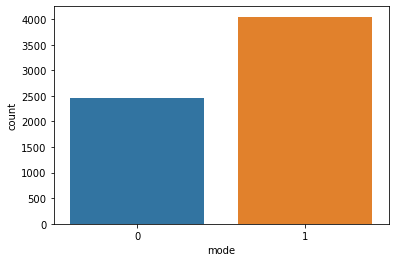

In [25]:
sns.countplot(x="mode", data=tcc);

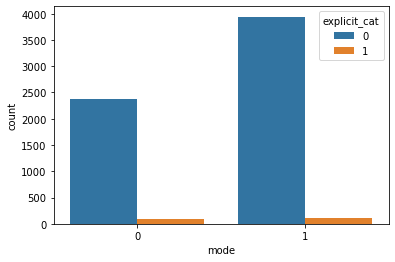

In [26]:
sns.countplot(x="mode", hue="explicit_cat", data=tcc);

# Time Signature

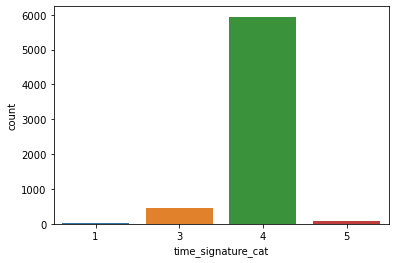

In [11]:
sns.countplot(x="time_signature_cat", data=tcc);

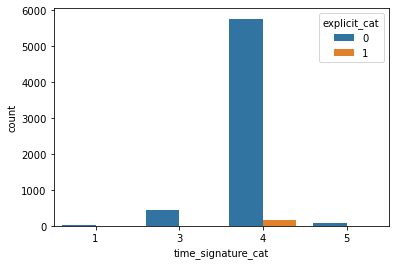

In [12]:
sns.countplot(x="time_signature_cat", hue="explicit_cat", data=tcc);

# Key

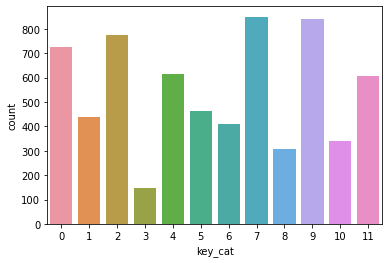

In [13]:
sns.countplot(x="key_cat", data=tcc);

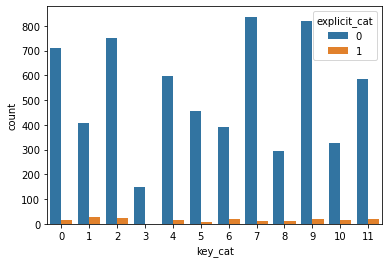

In [14]:
sns.countplot(x="key_cat", hue="explicit_cat", data=tcc);